In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

(60000, 28, 28)


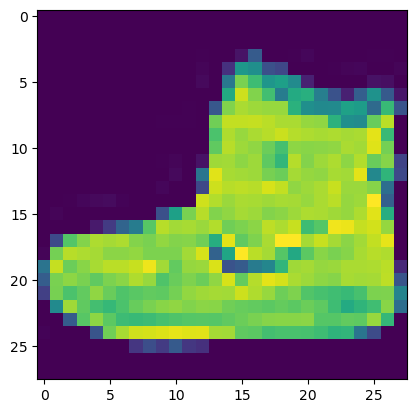

In [2]:
print(xtrain.shape)
plt.imshow(xtrain[0])

In [3]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
early_stopping = keras.callbacks.EarlyStopping(patience=2)
history = model.fit(xtrain, ytrain, epochs=30,
                    callbacks=[early_stopping],
                    validation_data=(xvalid, yvalid))
#switch optimizer from sgd to adam and added early_stopping callback

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4844 - accuracy: 0.8265 - val_loss: 0.3714 - val_accuracy: 0.8658
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3689 - accuracy: 0.8643 - val_loss: 0.3472 - val_accuracy: 0.8756
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3292 - accuracy: 0.8769 - val_loss: 0.3219 - val_accuracy: 0.8828
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.8860 - val_loss: 0.3161 - val_accuracy: 0.8848
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2847 - accuracy: 0.8940 - val_loss: 0.3113 - val_accuracy: 0.8870
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2705 - accuracy: 0.8980 - val_loss: 0.3341 - val_accuracy: 0.8806
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2576 - accuracy: 0.9029 - val_loss: 0.3212 - val_accuracy:

In [7]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 [==============================] - 0s 84ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [8]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]


In [9]:
np.argwhere(predictions!=0)

array([[0, 9],
       [1, 2],
       [2, 1],
       [3, 1],
       [4, 6]], dtype=int64)

In [10]:
ypred=model.predict(xtest)

313/313 [==============================] - 0s 737us/step


In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
class_names = ['T-shirt/top', 
          'Trouser',
          'Pullover',
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankle boot']
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, class_names)

In [13]:
cm = confusion_matrix(ytest, np.argmax(ypred, axis=1))

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)

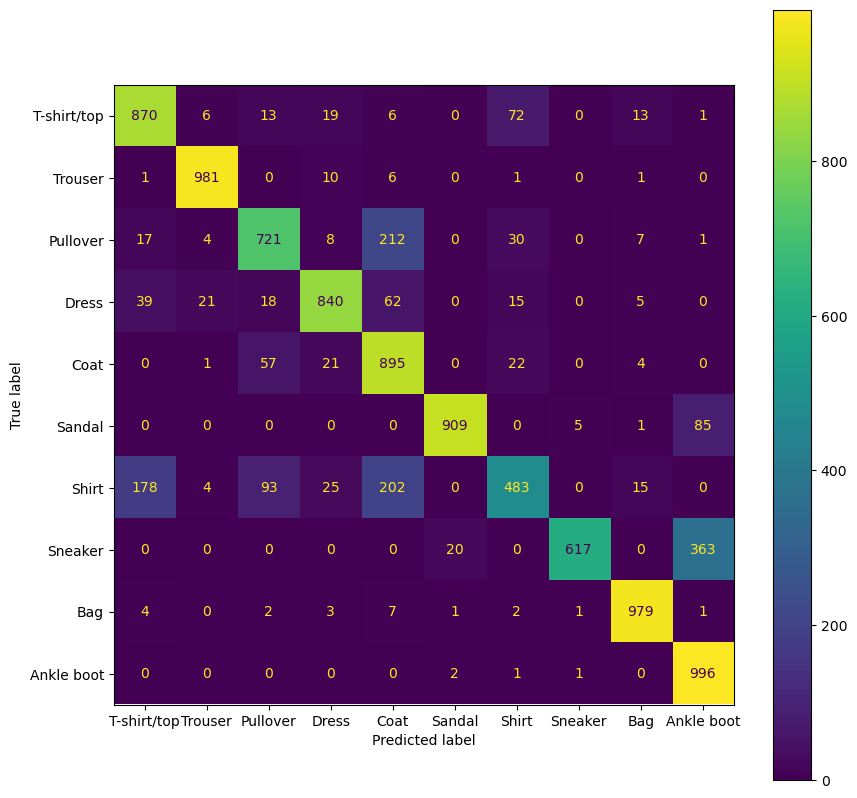

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)

In [16]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 0s 837us/step - loss: 69.8783 - accuracy: 0.8291


[69.8782730102539, 0.8291000127792358]